# Breast Cancer Model

## Importing all the required libraries for our model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

> Let's import dataset that is provided by sklearn itself.

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast_cancer = load_breast_cancer()

In [5]:
df = pd.DataFrame(data=breast_cancer.data,columns=breast_cancer.feature_names)

In [6]:
df['target'] = pd.Series(breast_cancer.target)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.shape

(569, 31)

## There are altogether 569 rowsets with 31 attributes.

In [10]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## No any attributes has got null value which is good as null value may create a problem while preparing the model.

In [11]:
for i in df.columns:
    print(i,":",df[i].value_counts())
    print("---"*40)

mean radius : 12.340    4
12.180    3
11.600    3
15.460    3
11.710    3
         ..
18.810    1
13.300    1
23.090    1
9.405     1
18.250    1
Name: mean radius, Length: 456, dtype: int64
------------------------------------------------------------------------------------------------------------------------
mean texture : 14.93    3
15.70    3
18.90    3
16.84    3
17.46    3
        ..
20.53    1
17.66    1
24.80    1
20.56    1
10.94    1
Name: mean texture, Length: 479, dtype: int64
------------------------------------------------------------------------------------------------------------------------
mean perimeter : 82.61     3
134.70    3
87.76     3
130.00    2
58.79     2
         ..
70.21     1
68.69     1
95.55     1
102.90    1
88.52     1
Name: mean perimeter, Length: 522, dtype: int64
------------------------------------------------------------------------------------------------------------------------
mean area : 512.2     3
1214.0    2
399.8     2
758.6     2
1075.0 

> Let's see the unique values. But it is clear that as most of the values are numerical types each attruibute has different values.

In [12]:
for i in df.columns:
    print(i,":",df[i].unique())
    print("---"*40)

mean radius : [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8   14.44  13.74
  8.

## Dividing the data into X and y(Features variables and target variable)

In [13]:
X = df.drop('target',axis=1)
y = df['target']

In [14]:
import seaborn as sns

## Observing the Correlation matrix to see the dependencies between different attributes.

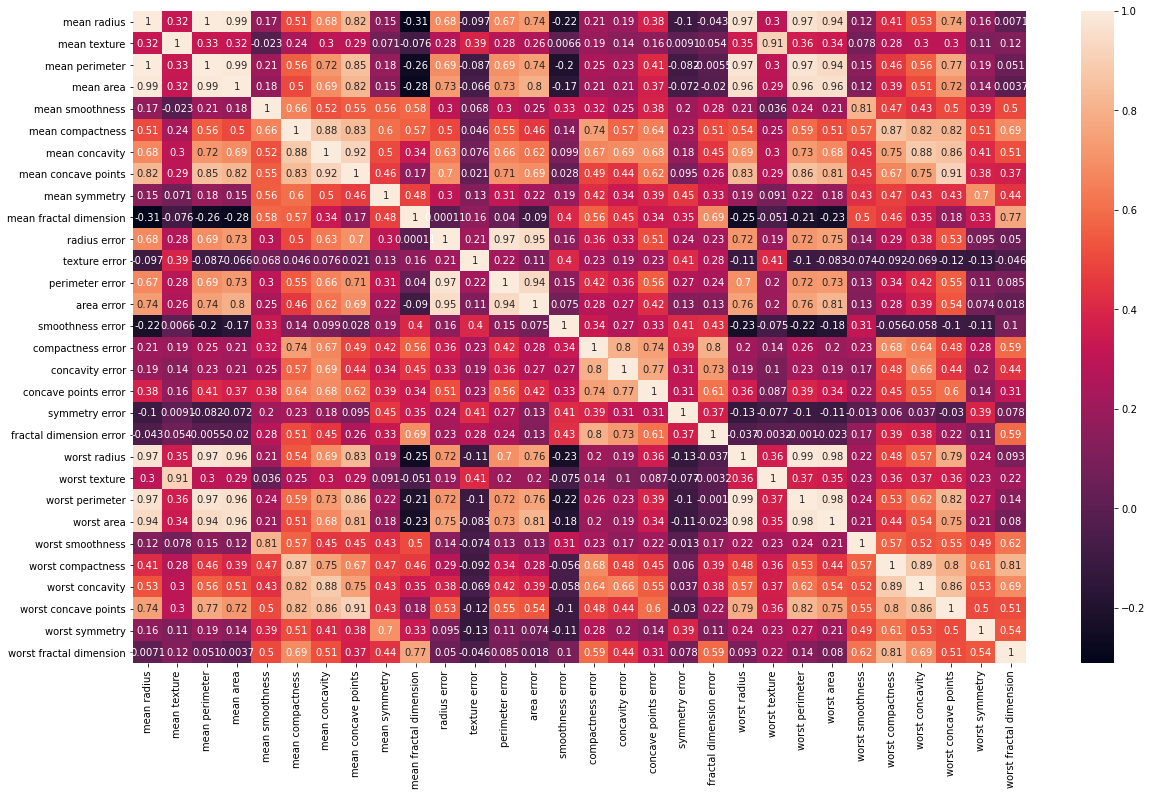

In [15]:
fig, ax= plt.subplots(figsize=(20,12))
sns.heatmap(X.corr(),annot=True)

> Mean perimeter, mean area, worst radius, worst perimeter, worst area: These attributes are contributing same as Mean Radius around the correlation of approximately 1, so we can drop these attributes.

In [16]:
X.drop(labels=['mean perimeter','mean area','worst radius','worst perimeter','worst area'],axis=1,inplace=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif = pd.DataFrame()

In [19]:
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [20]:
vif

,VIF Factor
0,72.079154
1,243.456033
2,363.155085
3,113.637745
4,142.694935
5,141.514435
6,176.144797
7,537.507108
8,99.763663
9,23.611098


In [21]:
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


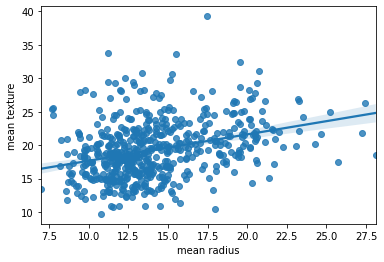

In [22]:
sns.regplot(x="mean radius",y='mean texture',data=df);

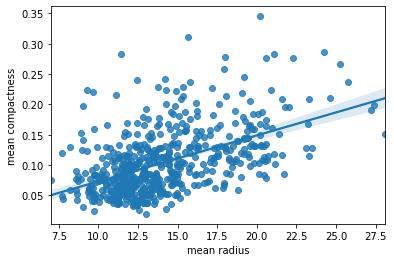

In [23]:
sns.regplot(x="mean radius",y='mean compactness',data=df);

# Lets be sure that all of our attributes are numerical, otherwise I have to convert them to numbers.

In [25]:
for label,content in X.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

mean radius
mean texture
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst texture
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


# Let's observe the distribution graph of each attribute to see how much they are deviated from the normal distribution, in other words lets see how much they are skewed.

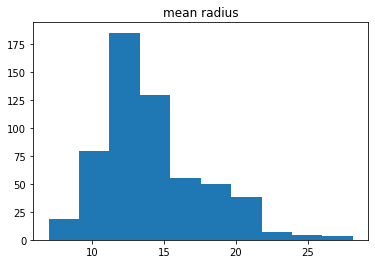

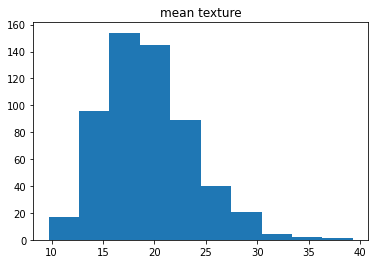

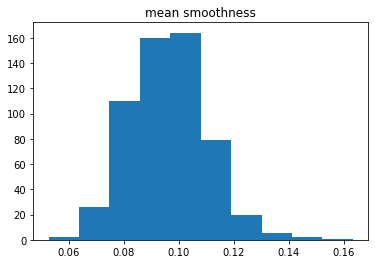

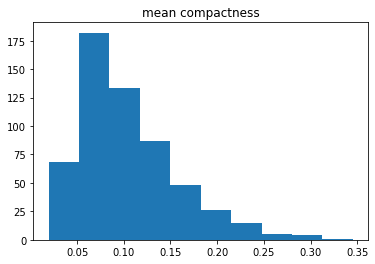

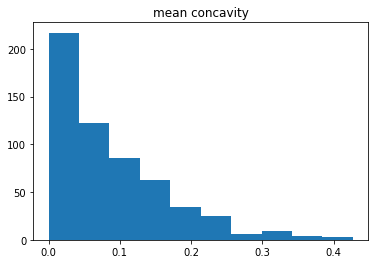

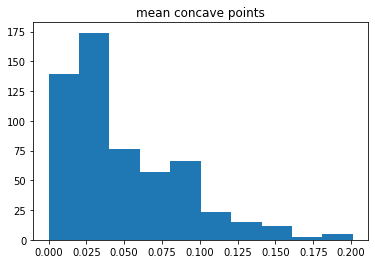

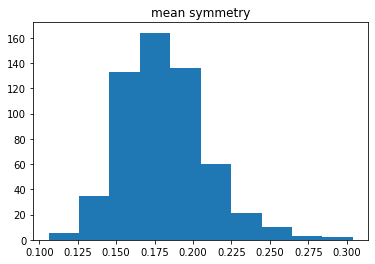

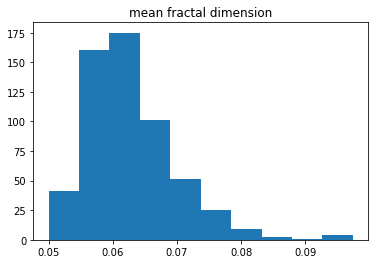

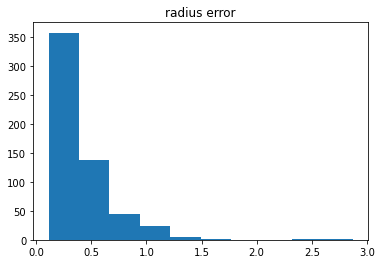

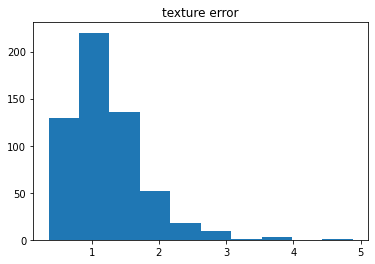

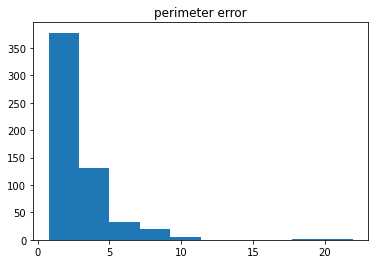

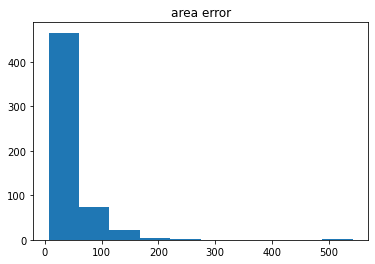

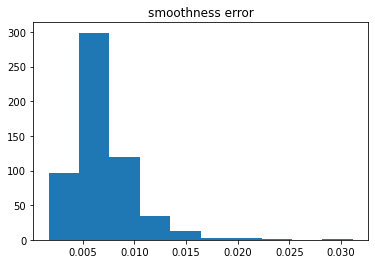

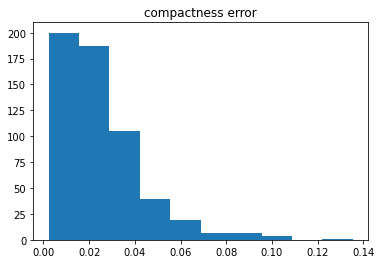

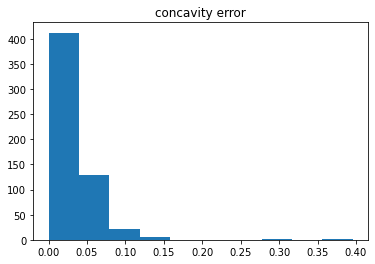

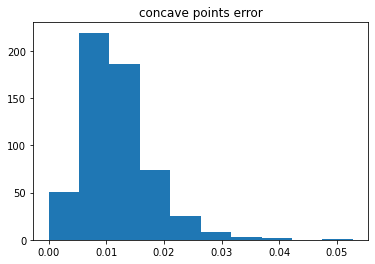

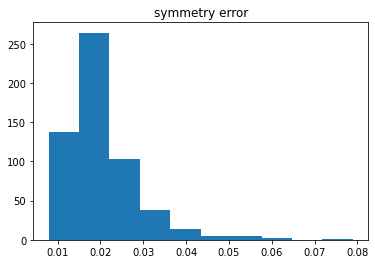

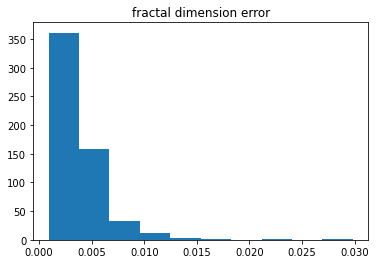

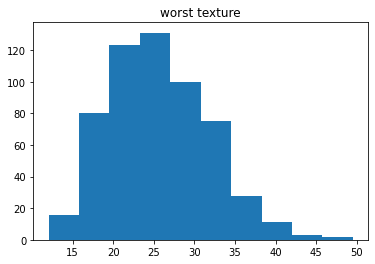

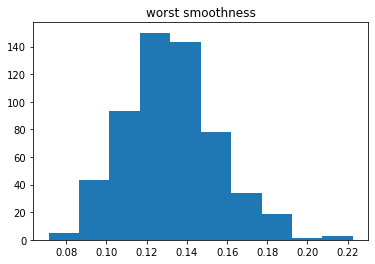

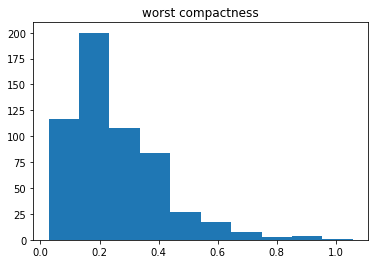

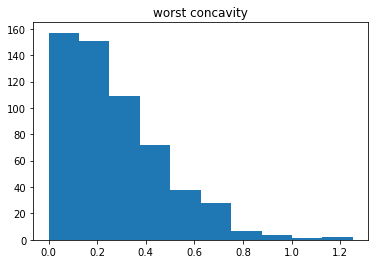

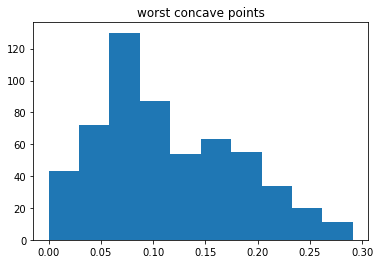

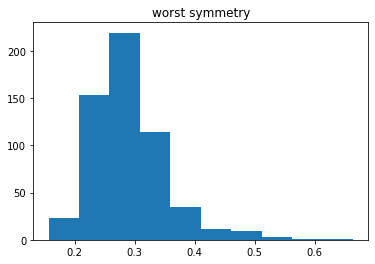

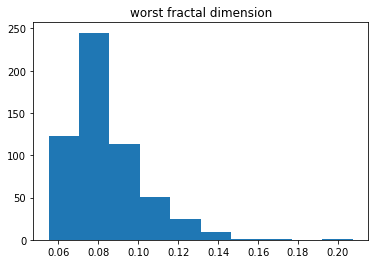

In [26]:
for i in X.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

## I am transforming some of the right skewed dataset using log transformation.

In [27]:
column_tranform = X[['mean concavity','radius error','texture error','perimeter error','area error','compactness error','concavity error','fractal dimension error','worst concavity']]

In [28]:
for i in column_tranform.columns:
    X[i] = np.log1p(X[i])

In [29]:
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.262441,0.14710,0.2419,0.07871,0.739554,0.644639,...,0.01587,0.03003,0.006174,17.33,0.1622,0.6656,0.537604,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.083330,0.07017,0.1812,0.05667,0.434053,0.550373,...,0.01340,0.01389,0.003526,23.41,0.1238,0.1866,0.216401,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.180153,0.12790,0.2069,0.05999,0.557098,0.580482,...,0.02058,0.02250,0.004561,25.53,0.1444,0.4245,0.371839,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.216240,0.10520,0.2597,0.09744,0.402527,0.768255,...,0.01867,0.05963,0.009166,26.50,0.2098,0.8663,0.522893,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.180653,0.10430,0.1809,0.05883,0.563722,0.577343,...,0.01885,0.01756,0.005102,16.67,0.1374,0.2050,0.336472,0.1625,0.2364,0.07678


## Let's split our dataset into training and testing

In [30]:
from sklearn.model_selection import train_test_split

## Since our main tarrget is to find whether a patient has breast cancer or not so it is cleartly a classification problem, so we need to use Classification Model.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
rc = RandomForestClassifier()

In [37]:
rc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
rc.score(X_train,y_train)

1.0

In [39]:
rc.score(X_test,y_test)

0.9649122807017544

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,plot_roc_curve

In [54]:
y_preds = rc.predict(X_test)

In [55]:
cm = confusion_matrix(y_test,y_preds)

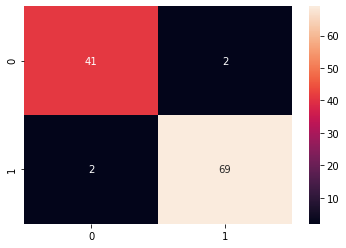

In [56]:
sns.heatmap(cm,annot=True)

In [57]:
from sklearn.model_selection import cross_val_score

## Ummmm... Not bad, we can see that our model has given good result using RandomForest Classifier, where our FalsePositive and FalseNegative are 2.

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [59]:
roc_auc_score(y_test,y_preds)

0.9626596790042582

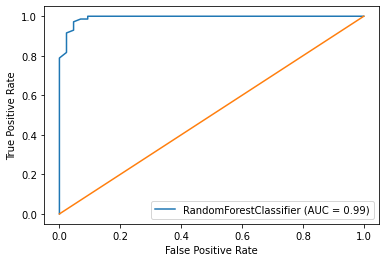

In [60]:
plot_roc_curve(rc,X_test,y_test);
plt.plot([0,1]);

* But wait... We did our trainined our model only on the first 80% of the dataset, what if we took middle 80% data for training or last 80% data for training, it might give us different results, so to be sure of that lets use cross validation with 10 Folds.

from sklearn.model_selection import cross_val_score

In [61]:
cv = cross_val_score(rc,X,y,cv=10)

In [62]:
np.mean(cv)

0.9595551378446115

## Ok, our initial assumptions didnot deviated. So we can consider that our inital guess was not wrong infact it gave us right assumptions.

## Let's try using one of the most popular boosting algorithm XGBoost to see if we can acheive any more accurcary or not.

In [64]:
from xgboost import XGBClassifier

In [65]:
boost = XGBClassifier()

In [66]:
boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
boost.score(X_train,y_train)

1.0

In [68]:
boost.score(X_test,y_test)

0.9649122807017544

In [69]:
params_boost ={"learning_rate":[0.001,0.01,0.1],
               
               "sub_samples":[0.5,0.7,1.0],
               "max_depth":[3,7,5]
              }

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
boost_grid = GridSearchCV(boost,params_boost,cv=5,verbose=2)

In [72]:
boost_grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.001, max_depth=3, sub_samples=0.5 ...............
[08:09:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.001, max_depth=3, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, sub_samples=0.5 ...............
[08:09:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verificat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=3, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, sub_samples=0.5 ...............
[08:09:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.001, max_depth=3, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, sub_samples=0.5 ...............
[08:09:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[CV]  learning_rate=0.001, max_depth=7, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, sub_samples=0.5 ...............
[08:09:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.001, max_depth=7, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=7, sub_samples=0.7 ...............
[08:09:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[CV]  learning_rate=0.001, max_depth=5, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, sub_samples=0.7 ...............
[08:09:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.001, max_depth=5, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, sub_samples=0.7 ...............
[08:09:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[CV] . learning_rate=0.01, max_depth=3, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, sub_samples=0.7 ................
[08:09:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] . learning_rate=0.01, max_depth=3, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, sub_samples=0.7 ................
[08:09:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[CV] . learning_rate=0.01, max_depth=7, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, sub_samples=0.7 ................
[08:09:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] . learning_rate=0.01, max_depth=7, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=7, sub_samples=0.7 ................
[08:09:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[CV] . learning_rate=0.01, max_depth=5, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, sub_samples=0.7 ................
[08:09:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] . learning_rate=0.01, max_depth=5, sub_samples=0.7, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, sub_samples=1.0 ................
[08:09:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[CV] learning_rate=0.1, max_depth=3, sub_samples=1.0 .................
[08:09:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] .. learning_rate=0.1, max_depth=3, sub_samples=1.0, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, sub_samples=1.0 .................
[08:09:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] .. l

[CV] .. learning_rate=0.1, max_depth=7, sub_samples=1.0, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, sub_samples=0.5 .................
[08:09:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] .. learning_rate=0.1, max_depth=5, sub_samples=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, sub_samples=0.5 .................
[08:09:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sub_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   11.5s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [73]:
boost_grid.score(X_train,y_train)

1.0

In [74]:
boost_grid.score(X_test,y_test)

0.9649122807017544

## Our accuracy is same as we did with our RandomForest Model so we can consider this is a good accuracy to predict whether a patient has breast cancer or not.

©️ Santosh Thapa 2020

In [ ]:
s